In [7]:
pip install textblob


   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   --- ------------------------------------ 61.4/626.3 kB 1.6 MB/s eta 0:00:01
   ----------------- ---------------------- 266.2/626.3 kB 3.2 MB/s eta 0:00:01
   ------------------------------------- -- 583.7/626.3 kB 4.6 MB/s eta 0:00:01
   ---------------------------------------- 626.3/626.3 kB 4.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
pip install python-pptx


   ---------------------------------------- 0.0/472.8 kB ? eta -:--:--
   ---------- ----------------------------- 122.9/472.8 kB 2.4 MB/s eta 0:00:01
   ------------------------------- -------- 368.6/472.8 kB 3.3 MB/s eta 0:00:01
   ---------------------------------------- 472.8/472.8 kB 3.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/159.9 kB ? eta -:--:--
   ---------------------------------------- 159.9/159.9 kB 9.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [34]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import numpy as np
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

In [35]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [36]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,Not Verified | My wife and I are very disappo...
1,Not Verified | We flew BA between Heathrow an...
2,Not Verified | Absolutely disgusted with BA. ...
3,Not Verified | Took a trip to Nashville with m...
4,Not Verified | A nightmare journey courtesy o...


In [ ]:
# Create the directory 
output_directory = "data"
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# save the DataFrame 
df.to_csv(f"{output_directory}/BA_reviews.csv")

In [4]:
# Loading the dataset with a encoding
df = pd.read_csv('reviews.csv', encoding='ISO-8859-1') 

In [5]:
# Cleaning the dataset
def clean_text(text):
    # Remove special characters and extra spaces
    text = re.sub(r'[^A-Za-z0-9\s]', '', text)
    return text.strip()

df['cleaned_reviews'] = df['Reviews'].apply(clean_text)


In [8]:
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis
df['sentiment'] = df['cleaned_reviews'].apply(get_sentiment)


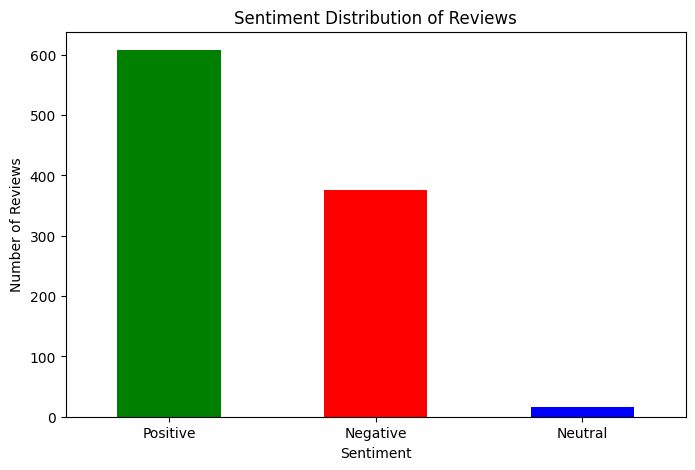

In [9]:
# Sentiment distribution
sentiment_counts = df['sentiment'].value_counts()

plt.figure(figsize=(8, 5))
sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Sentiment Distribution of Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.savefig('sentiment_distribution.png')
plt.show()


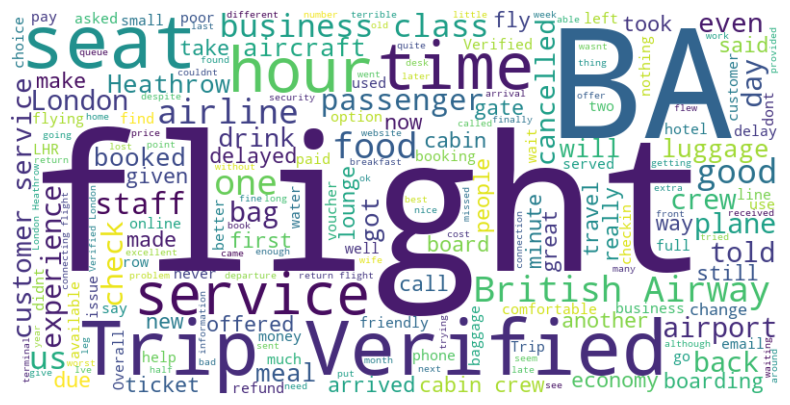

In [10]:
# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['cleaned_reviews']))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('word_cloud.png')
plt.show()


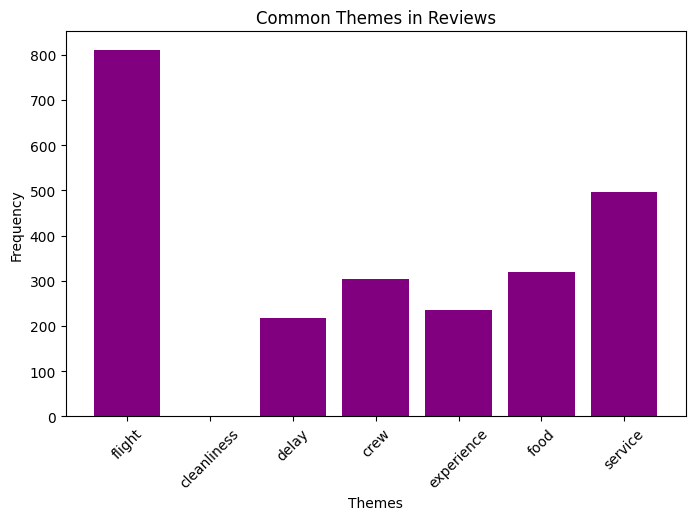

In [11]:
# Simple keyword extraction 
keywords = ['service', 'food', 'cleanliness', 'delay', 'crew', 'experience', 'flight']
theme_counts = Counter()

for review in df['cleaned_reviews']:
    for keyword in keywords:
        if keyword in review.lower():
            theme_counts[keyword] += 1

# Create a bar chart for common themes
plt.figure(figsize=(8, 5))
plt.bar(theme_counts.keys(), theme_counts.values(), color='purple')
plt.title('Common Themes in Reviews')
plt.xlabel('Themes')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.savefig('common_themes.png')
plt.show()


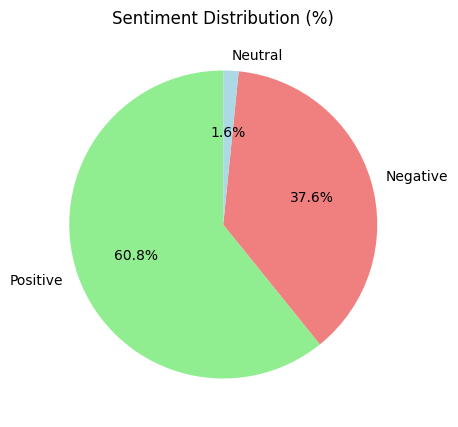

In [16]:
# Sentiment distribution as a percentage
sentiment_percentage = df['sentiment'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 5))
sentiment_percentage.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'lightcoral', 'lightblue'])
plt.title('Sentiment Distribution (%)')
plt.ylabel('')
plt.savefig('sentiment_percentage.png')
plt.show()


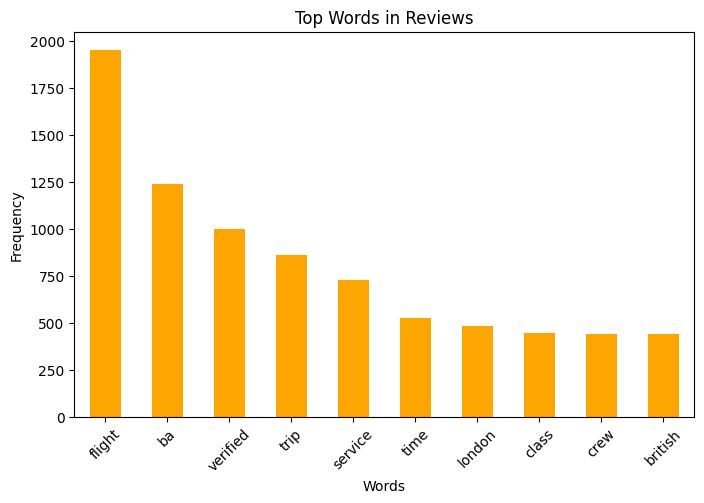

In [17]:
# Count vectorizer to get word counts
vectorizer = CountVectorizer(stop_words='english', max_features=10)
X = vectorizer.fit_transform(df['cleaned_reviews'])
word_freq = X.sum(axis=0)

# Create a DataFrame of word frequencies
words = vectorizer.get_feature_names_out()
word_freq_df = pd.DataFrame(word_freq, columns=words)

# Plotting word frequency
word_freq_df.T.sort_values(by=0, ascending=False).plot(kind='bar', legend=False, color='orange', figsize=(8, 5))
plt.title('Top Words in Reviews')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.savefig('word_frequency.png')
plt.show()


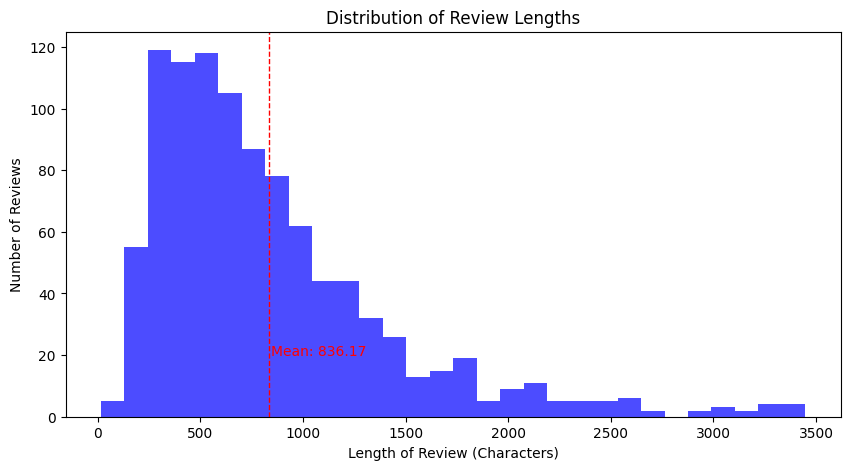

In [18]:
# Calculate review lengths
df['review_length'] = df['cleaned_reviews'].str.len()

plt.figure(figsize=(10, 5))
plt.hist(df['review_length'], bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Review Lengths')
plt.xlabel('Length of Review (Characters)')
plt.ylabel('Number of Reviews')
plt.axvline(df['review_length'].mean(), color='red', linestyle='dashed', linewidth=1)  # Mean line
plt.text(df['review_length'].mean() + 10, 20, 'Mean: {:.2f}'.format(df['review_length'].mean()), color='red')
plt.savefig('review_length_distribution.png')
plt.show()


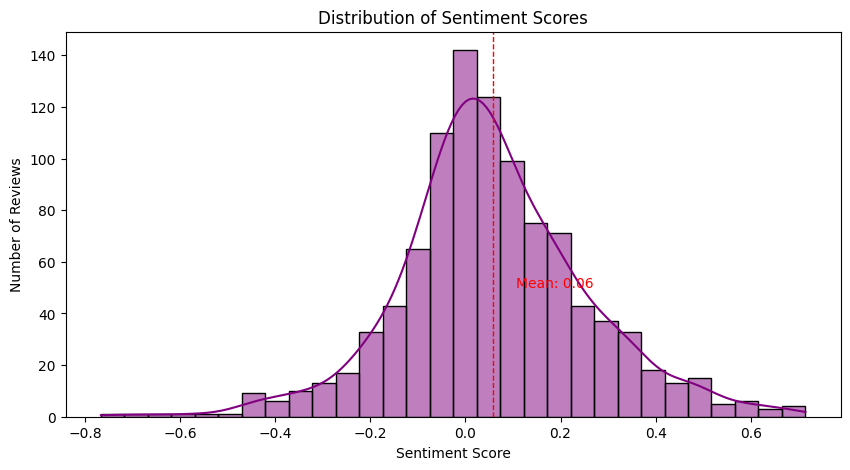

In [29]:
plt.figure(figsize=(10, 5))
sns.histplot(df['sentiment_score'], bins=30, color='purple', kde=True)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Number of Reviews')
plt.axvline(df['sentiment_score'].mean(), color='red', linestyle='dashed', linewidth=1)
plt.text(df['sentiment_score'].mean() + 0.05, 50, 'Mean: {:.2f}'.format(df['sentiment_score'].mean()), color='red')
plt.savefig('sentiment_score_distribution.png')
plt.show()


In [24]:
# Function to calculate sentiment score
def get_sentiment_score(review):
    return TextBlob(review).sentiment.polarity

# Apply the function to compute sentiment scores
df['sentiment_score'] = df['cleaned_reviews'].apply(get_sentiment_score)


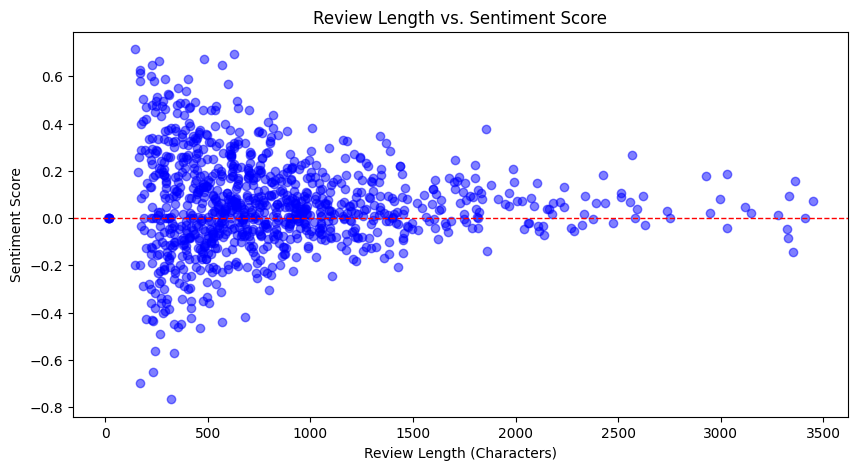

In [25]:
# Calculate review lengths
df['review_length'] = df['cleaned_reviews'].str.len()

plt.figure(figsize=(10, 5))
plt.scatter(df['review_length'], df['sentiment_score'], alpha=0.5, color='blue')
plt.title('Review Length vs. Sentiment Score')
plt.xlabel('Review Length (Characters)')
plt.ylabel('Sentiment Score')
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.savefig('length_vs_sentiment.png')
plt.show()


In [27]:
df['verification_status'] = ['verified' if i % 2 == 0 else 'unverified' for i in range(len(df))]


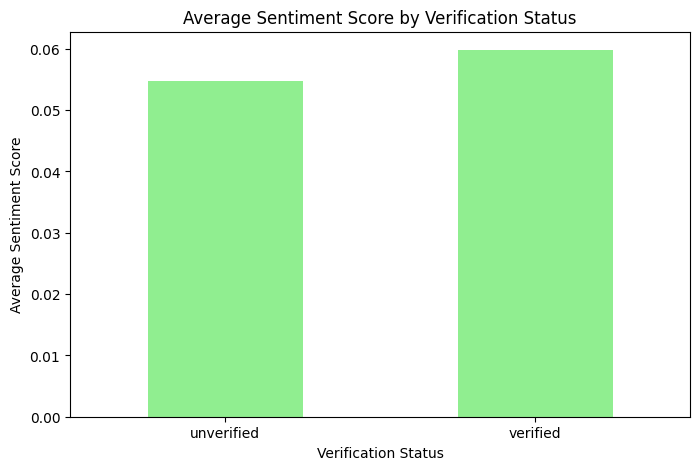

In [28]:
avg_sentiment_by_verification = df.groupby('verification_status')['sentiment_score'].mean()

plt.figure(figsize=(8, 5))
avg_sentiment_by_verification.plot(kind='bar', color='lightgreen')
plt.title('Average Sentiment Score by Verification Status')
plt.xlabel('Verification Status')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=0)
plt.savefig('avg_sentiment_by_verification.png')
plt.show()


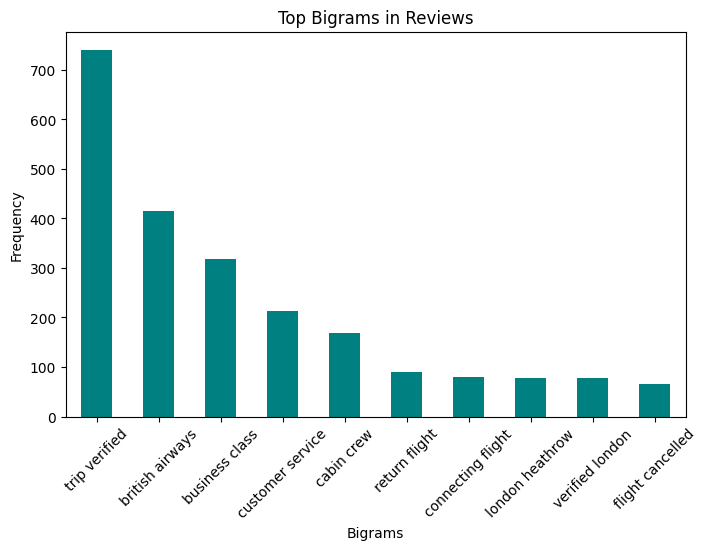

In [30]:
# Creating bigrams and count frequencies
bigram_vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english', max_features=10)
X_bigrams = bigram_vectorizer.fit_transform(df['cleaned_reviews'])
bigram_freq = X_bigrams.sum(axis=0)

# Creating a DataFrame for bigrams
bigrams = bigram_vectorizer.get_feature_names_out()
bigram_freq_df = pd.DataFrame(bigram_freq, columns=bigrams)

# Plotting
bigram_freq_df.T.sort_values(by=0, ascending=False).plot(kind='bar', legend=False, color='teal', figsize=(8, 5))
plt.title('Top Bigrams in Reviews')
plt.xlabel('Bigrams')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.savefig('top_bigrams.png')
plt.show()


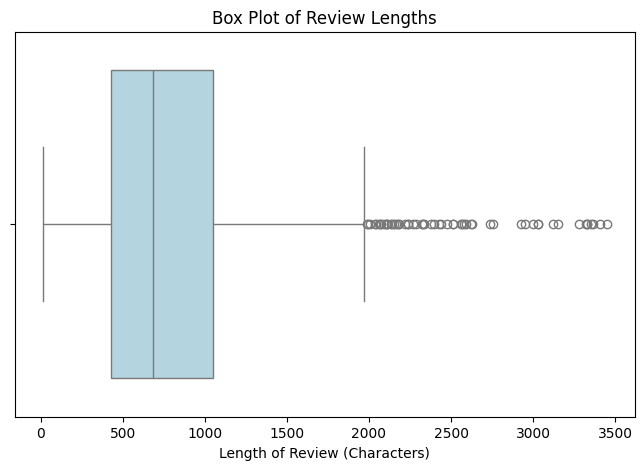

In [31]:
df['review_length'] = df['cleaned_reviews'].str.len()

plt.figure(figsize=(8, 5))
sns.boxplot(x=df['review_length'], color='lightblue')
plt.title('Box Plot of Review Lengths')
plt.xlabel('Length of Review (Characters)')
plt.savefig('review_length_boxplot.png')
plt.show()
